# Prueba de evaluación continua 1

## Parte 3. La deuda de los países (33%) 

En este caso vamos a tratar con un dataset del banco Mundial sobre estadística de deuda de los países. 

El dataset se puede descargar de esta página:
https://www.kaggle.com/theworldbank/international-debt-statistics (https://www.kaggle.com /theworldbank/international-debt-statistics) 

La contabilidad de la deuda es compleja y requiere conocimientos para entenderla en su totalidad. La descripción de las variables se encuentra aquí:
http://databank.worldbank.org/data/download/site-content/ids2015.pdf (http://databank.worldbank.org /data/download/site-content/ids2015.pdf) 

De manera básica, utilizaremos el dataset para tratar de contrastar algunas posibles ideas intuitivas sobre la relación de la deuda con variables macroeconómicas y su distribución geográﬁca

### Tareas a realizar:

+ Obtener los datos del período 2000-2010 de la deuda externa (DT.DOD.DECT.CD (http://DT.DOD.DECT.CD)) por países ("Country Name"), transponer las columnas a ﬁlas y dibujar las series. ¿La visualización nos dice algo? ¿Es adecuada? 
+ Obtener los cuatro países de mayor deuda en 2010 y los cuatro de menos (descartar previamente lo que no sean países sino agrupaciones de países). Volver a dibujar como en el apartado anterior, pero solo los ocho seleccionados. 
+ Conseguir en Internet la población de los países anteriores (copiar los valores "a mano" en un ﬁchero de texto, y fusionarlos con la tabla existente mediante el "Country Code".) y observar si hay correlación o algún tipo de relación entre la población y la deuda externa. 
+ Calcular el ratio de deuda externa con el Gross national income (GNI) para todos los países y obtener los países que tienen un ratio más alto en la media de los años 2000 a 2010. 
+ [parte libre] Buscar y comentar alguna relación entre agregados económicos de los que aparecen en el dataset (excluyendo el GNI) y algún componente de la deuda. Utilizar correlaciones y en su caso modelos lineales básicos.

Importamos las bibliotecas que vamos a usar y cargamos el dataset en un pandas dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
idset = pd.read_csv("international-debt-statistics.zip", compression = 'zip')
print idset.size
idset.head(20)

1682040


,"﻿""Country Name""",Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 59
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.PRVT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,Average interest on new external debt commitme...,DT.INR.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,Average interest on new external debt commitme...,DT.INR.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,Average interest on new external debt commitme...,DT.INR.PRVT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,Average maturity on new external debt commitme...,DT.MAT.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La última columna parece podemos eliminarla. Vamos a comprobarlo.

In [3]:
print len(idset.index)
idset[['Unnamed: 59']].isnull().sum()

28034


Unnamed: 59    28034
dtype: int64

Hemos confirmado que podemos eliminarla.

In [4]:
del(idset['Unnamed: 59'])

También parece que el nombre de la columna para Country Name puede darnos problemas.

In [5]:
idset.columns.values

array(['\xef\xbb\xbf"Country Name"', 'Country Code', 'Indicator Name',
       'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

Vamos a corregirlo

In [6]:
idset.columns = ['Country Name', 'Country Code', 'Indicator Name','Indicator Code', '1970', '1971', '1972', '1973', '1974', 
                 '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', 
                 '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', 
                 '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', 
                 '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
idset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seleccionamos la variable indicadora de deuda externa 'DT.DOD.DECT.CD'

In [7]:
idset_extdebt = idset[idset['Indicator Code']=='DT.DOD.DECT.CD']

Establecemos Country Name como indice, seleccionamos periodo de 2000 a 2010 y transponemos las columnas a filas.

In [8]:
idset_extdebt_2000_2010 = idset_extdebt.set_index('Country Name').loc[:, '2000':'2010'].T
idset_extdebt_2000_2010.head(10)

Country Name,Afghanistan,Albania,Algeria,All developing countries,Angola,Armenia,Azerbaijan,Bangladesh,Belarus,Belize,...,Turkmenistan,Uganda,Ukraine,Upper middle income,Uzbekistan,Vanuatu,Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
2000,NaN,1.122296e+09,2.547693e+10,1.742960e+12,9.763470e+09,1.009643e+09,1.524261e+09,1.559607e+10,2.604108e+09,5.279020e+08,...,2.509436e+09,3.535146e+09,1.389009e+10,1.043220e+12,4.979871e+09,95670000.0,1.285928e+10,5.162399e+09,5.811476e+09,3.832043e+09
2001,NaN,1.154850e+09,2.276389e+10,1.756875e+12,8.776913e+09,1.401649e+09,1.459853e+09,1.492421e+10,2.780349e+09,5.978810e+08,...,2.229529e+09,3.768223e+09,2.218211e+10,1.076943e+12,5.208444e+09,92032000.0,1.261666e+10,5.197891e+09,6.189777e+09,3.644778e+09
2002,NaN,1.181526e+09,2.304022e+10,1.820742e+12,9.110398e+09,1.711690e+09,1.626957e+09,1.663286e+10,3.378292e+09,6.973290e+08,...,2.060367e+09,4.014527e+09,2.342315e+10,1.116698e+12,5.151824e+09,112584000.0,1.334681e+10,5.337942e+09,6.674671e+09,3.978768e+09
2003,NaN,1.552159e+09,2.377485e+10,1.953504e+12,9.099853e+09,1.994268e+09,1.876746e+09,1.838549e+10,3.760979e+09,9.095300e+08,...,1.889766e+09,4.565233e+09,2.574826e+10,1.194071e+12,5.295598e+09,121146000.0,1.595835e+10,5.524634e+09,6.874318e+09,4.603900e+09
2004,NaN,1.606136e+09,2.242665e+10,2.081974e+12,9.786141e+09,2.106357e+09,2.019786e+09,1.965923e+10,4.584153e+09,9.278910e+08,...,1.630781e+09,4.769348e+09,3.068915e+10,1.294476e+12,5.215731e+09,145931000.0,1.799307e+10,5.616361e+09,7.540235e+09,4.953634e+09
2005,NaN,2.101163e+09,1.709240e+10,2.089796e+12,1.222396e+10,1.968027e+09,2.118242e+09,1.844882e+10,5.283532e+09,9.888200e+08,...,1.157800e+09,4.436715e+09,3.370593e+10,1.343201e+12,4.655813e+09,105348000.0,1.903868e+10,5.500561e+09,5.458981e+09,4.444631e+09
2006,9.691970e+08,2.465359e+09,5.910801e+09,2.267447e+12,9.890494e+09,2.136305e+09,2.687517e+09,2.010578e+10,6.543942e+09,1.023887e+09,...,9.910510e+08,1.276225e+09,5.248666e+10,1.507680e+12,4.487901e+09,107584000.0,1.864855e+10,5.705769e+09,2.375621e+09,4.908101e+09
2007,2.012885e+09,2.897759e+09,6.134509e+09,2.693260e+12,1.193168e+10,3.078652e+09,3.728508e+09,2.137264e+10,1.248816e+10,1.048500e+09,...,8.537490e+08,1.628567e+09,7.892908e+10,1.811890e+12,4.647813e+09,123899000.0,2.328472e+10,6.152424e+09,2.857153e+09,5.707379e+09
2008,2.133805e+09,4.238095e+09,6.246392e+09,2.908884e+12,1.550157e+10,3.609238e+09,4.465748e+09,2.292939e+10,1.512151e+10,1.252490e+09,...,7.457210e+08,2.268362e+09,9.826630e+10,1.942263e+12,5.108326e+09,150881000.0,2.648763e+10,6.318635e+09,3.079658e+09,5.710814e+09
2009,2.469925e+09,4.310066e+09,7.405467e+09,3.175081e+12,1.701427e+10,4.932598e+09,4.754598e+09,2.459598e+10,2.205383e+10,1.270864e+09,...,6.614750e+08,2.738678e+09,1.043271e+11,2.102098e+12,6.961540e+09,155309000.0,3.308383e+10,6.734195e+09,3.774356e+09,6.000141e+09


Ahora visualizamos la series.

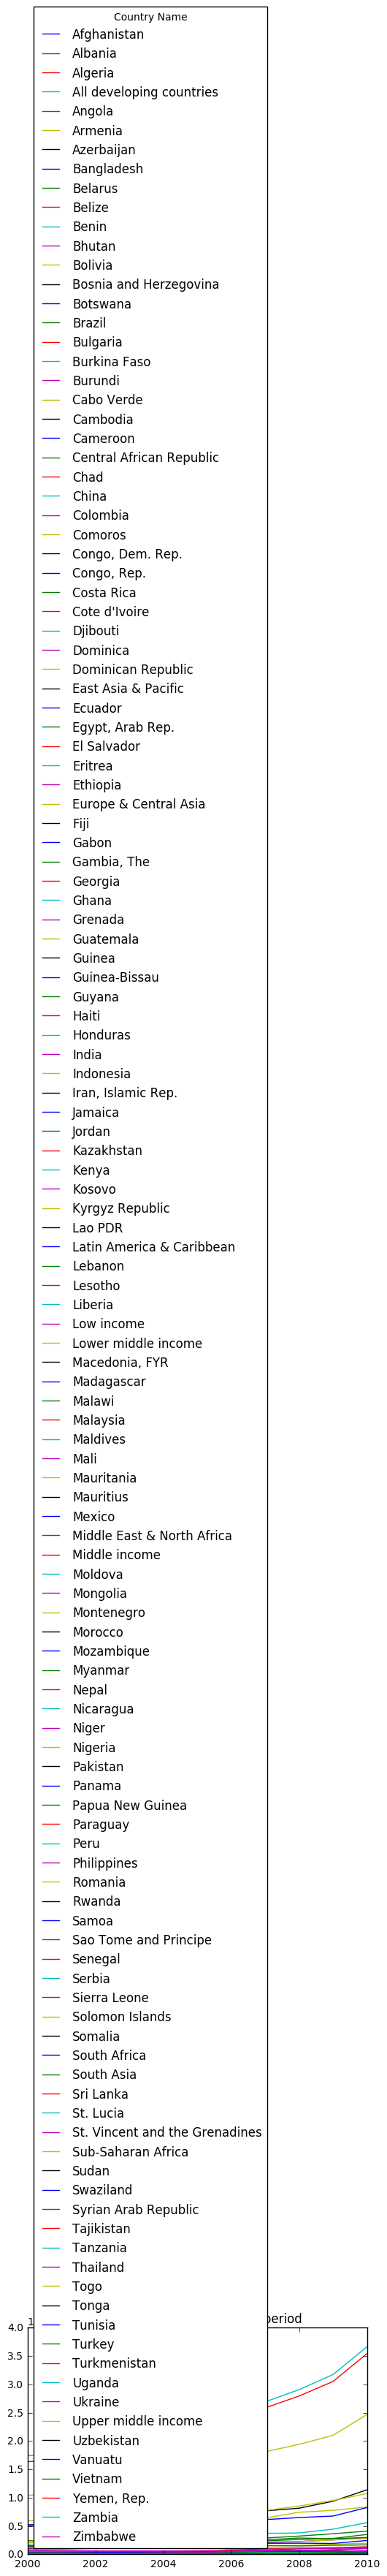

In [9]:
idset_extdebt_2000_2010.plot(title='External debt in 2000-2010 period')

Podemos comprobar que la visualizacion de las series en una misma gráfica no es adecuada para un número tan elevado de países. Es imposible diferenciar las líneas. Podriamos solucionarlo dibujando menos países en cada gráfica.

Vamos a seleccionar los cuatro paises con mayor deuda en 2010. Primero descartamos las agrupaciones de paises.

In [10]:
countries = idset_extdebt_2000_2010.columns.values
countries

array(['Afghanistan', 'Albania', 'Algeria', 'All developing countries',
       'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Eritrea', 'Ethiopia',
       'Europe & Central Asia', 'Fiji', 'Gabon', 'Gambia, The', 'Georgia',
       'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kyrgyz Republic', 'Lao PDR', 'Latin America & Caribbean',
       'Lebanon', 'Lesot

Podemos ver en el documento del banco mundial, que las agrupaciones de países  y otros grupos son: **'All developing countries', 'East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Low income', 'Lower middle income', 'Middle East & North Africa', 'Middle income', 'South Asia', 'Sub-Saharan Africa' y 'Upper middle income'**

In [11]:
country_groups = ['All developing countries', 'East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 
                  'Low income', 'Lower middle income', 'Middle East & North Africa', 'Middle income', 'South Asia', 
                  'Sub-Saharan Africa', 'Upper middle income']
idset_ext_debt_2000_2010 = idset_extdebt_2000_2010.drop(country_groups, axis = 1)
idset_ext_debt_2000_2010

Country Name,Afghanistan,Albania,Algeria,Angola,Armenia,Azerbaijan,Bangladesh,Belarus,Belize,Benin,...,Turkey,Turkmenistan,Uganda,Ukraine,Uzbekistan,Vanuatu,Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
2000,NaN,1.122296e+09,2.547693e+10,9.763470e+09,1.009643e+09,1.524261e+09,1.559607e+10,2.604108e+09,5.279020e+08,1.369959e+09,...,1.167927e+11,2.509436e+09,3.535146e+09,1.389009e+10,4.979871e+09,95670000.0,1.285928e+10,5.162399e+09,5.811476e+09,3.832043e+09
2001,NaN,1.154850e+09,2.276389e+10,8.776913e+09,1.401649e+09,1.459853e+09,1.492421e+10,2.780349e+09,5.978810e+08,1.448760e+09,...,1.129352e+11,2.229529e+09,3.768223e+09,2.218211e+10,5.208444e+09,92032000.0,1.261666e+10,5.197891e+09,6.189777e+09,3.644778e+09
2002,NaN,1.181526e+09,2.304022e+10,9.110398e+09,1.711690e+09,1.626957e+09,1.663286e+10,3.378292e+09,6.973290e+08,1.585651e+09,...,1.295273e+11,2.060367e+09,4.014527e+09,2.342315e+10,5.151824e+09,112584000.0,1.334681e+10,5.337942e+09,6.674671e+09,3.978768e+09
2003,NaN,1.552159e+09,2.377485e+10,9.099853e+09,1.994268e+09,1.876746e+09,1.838549e+10,3.760979e+09,9.095300e+08,1.460923e+09,...,1.426125e+11,1.889766e+09,4.565233e+09,2.574826e+10,5.295598e+09,121146000.0,1.595835e+10,5.524634e+09,6.874318e+09,4.603900e+09
2004,NaN,1.606136e+09,2.242665e+10,9.786141e+09,2.106357e+09,2.019786e+09,1.965923e+10,4.584153e+09,9.278910e+08,1.586768e+09,...,1.581723e+11,1.630781e+09,4.769348e+09,3.068915e+10,5.215731e+09,145931000.0,1.799307e+10,5.616361e+09,7.540235e+09,4.953634e+09
2005,NaN,2.101163e+09,1.709240e+10,1.222396e+10,1.968027e+09,2.118242e+09,1.844882e+10,5.283532e+09,9.888200e+08,1.536152e+09,...,1.721430e+11,1.157800e+09,4.436715e+09,3.370593e+10,4.655813e+09,105348000.0,1.903868e+10,5.500561e+09,5.458981e+09,4.444631e+09
2006,9.691970e+08,2.465359e+09,5.910801e+09,9.890494e+09,2.136305e+09,2.687517e+09,2.010578e+10,6.543942e+09,1.023887e+09,6.290010e+08,...,2.095936e+11,9.910510e+08,1.276225e+09,5.248666e+10,4.487901e+09,107584000.0,1.864855e+10,5.705769e+09,2.375621e+09,4.908101e+09
2007,2.012885e+09,2.897759e+09,6.134509e+09,1.193168e+10,3.078652e+09,3.728508e+09,2.137264e+10,1.248816e+10,1.048500e+09,7.549130e+08,...,2.584537e+11,8.537490e+08,1.628567e+09,7.892908e+10,4.647813e+09,123899000.0,2.328472e+10,6.152424e+09,2.857153e+09,5.707379e+09
2008,2.133805e+09,4.238095e+09,6.246392e+09,1.550157e+10,3.609238e+09,4.465748e+09,2.292939e+10,1.512151e+10,1.252490e+09,9.718140e+08,...,2.889883e+11,7.457210e+08,2.268362e+09,9.826630e+10,5.108326e+09,150881000.0,2.648763e+10,6.318635e+09,3.079658e+09,5.710814e+09
2009,2.469925e+09,4.310066e+09,7.405467e+09,1.701427e+10,4.932598e+09,4.754598e+09,2.459598e+10,2.205383e+10,1.270864e+09,1.317169e+09,...,2.772797e+11,6.614750e+08,2.738678e+09,1.043271e+11,6.961540e+09,155309000.0,3.308383e+10,6.734195e+09,3.774356e+09,6.000141e+09


Seleccionamos 2010 y ordenamos valores

In [12]:
idset_ext_debt_2010 = idset_ext_debt_2000_2010.loc['2010'].sort_values()

Nos quedamos con los cuatro primeros (menor deuda) y los cuatro últimos (mayor deuda).

In [13]:
idset_ext_debt_2010.head(4)

Country Name
Tonga                    153651000.0
Vanuatu                  173330000.0
Sao Tome and Principe    180881000.0
Solomon Islands          230757000.0
Name: 2010, dtype: float64

Los países con menor deuda externa en 2010 fueron Tonga, Vanuatu, Sao Tome and Principe y Solomon Islands

In [14]:
idset_ext_debt_2010.tail(4)

Country Name
India     2.916505e+11
Turkey    2.991132e+11
Brazil    3.523644e+11
China     5.597721e+11
Name: 2010, dtype: float64

Los de mayor deuda externa fueron China, Brazil, Turquía e India.

In [15]:
min_ext_debt_countries = idset_ext_debt_2010.head(4).index.values.tolist()
max_ext_debt_countries = idset_ext_debt_2010.tail(4).index.values.tolist()

Visualizamos la evolución de la deuda desde 2000 hasta 2010 para estos ocho paises

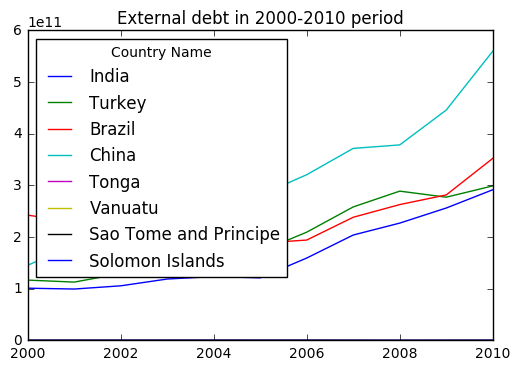

In [16]:
countries_in_study = max_ext_debt_countries + min_ext_debt_countries
idset_ext_debt_2000_2010[countries_in_study].plot(title = "External debt in 2000-2010 period")

Representar los ocho países en una misma gráfica no es adecuado puesto que para los países con menor deuda externa, esa cantidad no llega al billón de dólares. Sin embargo, los países con mayor deuda están en el orden de cientos de billones de dólares.

Vamos a dividir los valores de deuda entre 10^9 para que se representen como billones de dólares y vamos a mostrar los países con mayor deuda y los de menor en gráficos separados.

In [17]:
idset_ext_debt_2000_2010.ix[:,:] = idset_ext_debt_2000_2010.values/(10**9)

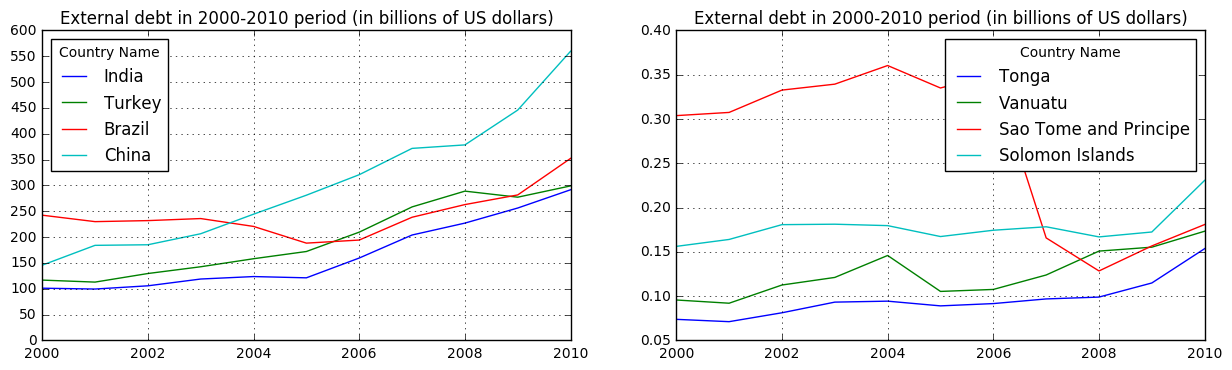

In [18]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
idset_ext_debt_2000_2010[max_ext_debt_countries].plot(title = "External debt in 2000-2010 period (in billions of US dollars)",
                                                      yticks = range(0,650,50),
                                                      grid = True, ax = ax1)
idset_ext_debt_2000_2010[min_ext_debt_countries].plot(title = "External debt in 2000-2010 period (in billions of US dollars)",
                                                      grid = True, ax=ax2)

En el fichero Population.txt hemos recogido el dato de la población en millones de habitantes para estos ocho países.

In [19]:
population_df = pd.read_table("Population.txt")
population_df

,Country Name,Population(millions)
0,China,1339.720
1,Brazil,206.930
2,India,1336.290
3,Turkey,78.740
4,Tonga,0.103
5,Vanuatu,0.253
6,Sao Tome and Principe,0.192
7,Solomon Islands,0.561


Fusionamos esta tabla con la que ya tenemos, mediante el 'Country Code'.

In [20]:
idset2 = idset.merge(population_df, how="outer", on = "Country Name")

Volvemos a filtrar por el dato en estudio, el de deuda externa.

In [21]:
idset2_ext_debt = idset2[idset2['Indicator Code']=='DT.DOD.DECT.CD']

Establecemos Country Name como índice y seleccionamos los países en estudio.

In [22]:
idset2_ext_debt = idset2_ext_debt.set_index('Country Name')
idset2_ext_debt.loc[countries_in_study]

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Population(millions)
Country Name,,,,,,,,,,,,,,,,,,,,,
India,IND,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,8.425121e+09,9.328742e+09,1.002927e+10,1.096592e+10,1.269695e+10,1.386561e+10,1.458639e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1336.290
Turkey,TUR,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,2.746452e+09,3.287189e+09,3.554567e+09,4.204213e+09,4.632821e+09,5.058838e+09,6.001278e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.740
Brazil,BRA,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,5.984158e+09,7.726268e+09,1.186168e+10,1.504921e+10,2.244814e+10,2.773395e+10,3.379934e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.930
China,CHN,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1339.720
Tonga,TON,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103
Vanuatu,VUT,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253
Sao Tome and Principe,STP,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192
Solomon Islands,SLB,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.561


Ahora representamos los valores de la deuda en relación con la población. Vamos a tomar el año 2014 que es el año para el que se han recogido los datos de población.

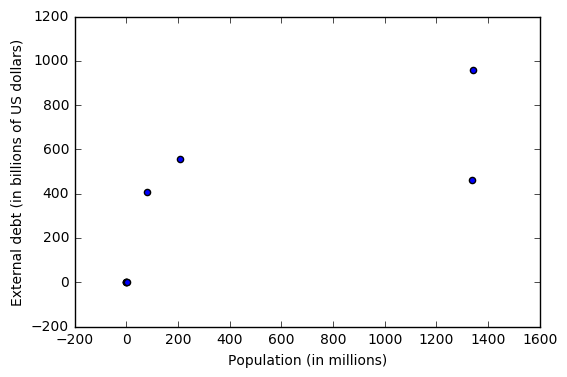

0.773704193214
1.66749856016e+14


In [23]:
ext_debt_2014 = idset2_ext_debt.loc[countries_in_study]['2014']
population = pd.to_numeric(idset2_ext_debt.loc[countries_in_study]['Population(millions)'])

x = population.values
y = ext_debt_2014.values/10**9 #Convertimos a billones de dolares
plt.scatter(x,y)
plt.xlabel("Population (in millions)")
plt.ylabel("External debt (in billions of US dollars)")
plt.show()
print population.corr(ext_debt_2014)
print population.cov(ext_debt_2014)

Por los resultados de correlación y covarianza, vemos que la deuda externa aumenta junto con la población y la relación lineal es bastante alta.

Calculamos el ratio de deuda externa con el Gross National Income (GNI). Tomamos los dos indicadores en los que estamos interesados.

In [25]:
idset_dod_gni = idset[np.any([idset['Indicator Code']=='NY.GNP.MKTP.CD',idset['Indicator Code']=='DT.DOD.DECT.CD'],axis=0)]
idset_dod_gni.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
53,Afghanistan,AFG,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Afghanistan,AFG,GNI (current US$),NY.GNP.MKTP.CD,1.784444e+09,1.868887e+09,1.631109e+09,1.771109e+09,2.202222e+09,2.417778e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Albania,ALB,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,Albania,ALB,GNI (current US$),NY.GNP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,Algeria,DZA,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,9.395590e+08,1.260811e+09,1.549797e+09,2.991380e+09,3.365978e+09,4.632813e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculamos el ratio para todos los paises en el periodo 1970-2014. 

In [26]:
dod = idset_dod_gni[idset_dod_gni['Indicator Code']=='DT.DOD.DECT.CD'].loc[:,'1970':'2014']
gni = idset_dod_gni[idset_dod_gni['Indicator Code']=='NY.GNP.MKTP.CD'].loc[:,'1970':'2014']

In [27]:
ratio = np.divide(dod.values,gni.values)

Creamos una dataframe que recoge estos valores para cada país y cada uno de los años de ese periodo.

In [32]:
years=['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986',
      '1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003',
      '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
countries = idset_dod_gni['Country Name'].unique()
ratio_df = pd.DataFrame(ratio, index = countries, columns = years)
ratio_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.136489,0.203865,0.208511,0.196950,0.151470,0.145862,0.131248,0.125994,0.121937
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.246008,0.263772,0.263478,0.327374,0.363622,0.440454,0.484410,0.584097,0.651254,0.607985
Algeria,0.198137,0.250334,0.229958,0.346251,0.256203,0.301210,0.351076,0.514258,0.610195,0.573134,...,0.173331,0.052492,0.046057,0.036807,0.054453,0.045007,0.030656,0.027202,0.025362,0.025994
All developing countries,0.130808,0.142864,0.147861,0.143847,0.143969,0.156344,0.175577,0.208536,0.235047,0.229930,...,0.252795,0.231943,0.223250,0.203572,0.220823,0.208351,0.200516,0.209947,0.218817,0.221859
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.504506,0.279222,0.226718,0.220661,0.249115,0.229208,0.207383,0.204569,0.222702,0.239353


Obtenemos los países que tienen más ratio más alto en la media de los años 2000 a 2010

In [33]:
ratio_df.loc[:,'2000':'2010'].mean(axis = 1).sort_values(ascending = False).head(5)

Liberia                  7.385635
Sao Tome and Principe    2.390393
Guinea-Bissau            1.879192
Congo, Rep.              1.494459
Guyana                   1.359730
dtype: float64

**Parte opcional** - Tomamos como agregados económicos "Exports of good, services, and primary income" (BX.GSR.TOTL.CD) e "Imports of good, services, and primary income" (BM.GSR.TOTL.CD), para obtener la balanza comercial ("Balance of trade) de China en el periodo 2000-2010 y ver su posible relación con el componente de deuda "Private sector debt" (DT.DOD.PRVS.CD).

Calculamos coeficiente de correlación.

In [34]:
idset3 = idset[np.any([idset['Indicator Code']=='BX.GSR.TOTL.CD',idset['Indicator Code']=='BM.GSR.TOTL.CD',
                      idset['Indicator Code']=='DT.DOD.PRVS.CD'],axis=0)]
idset3_china = idset3[idset3['Country Name']=='China'].set_index('Indicator Code').loc[:,'2000':'2010'].T
bot = pd.Series((idset3_china['BX.GSR.TOTL.CD'].values - idset3_china['BM.GSR.TOTL.CD'].values), index = idset3_china.index)
psd = idset3_china['DT.DOD.PRVS.CD']
bot.corr(psd)

0.85409639597958664

Calculamos covarianza.

In [35]:
bot.cov(psd)

3.4103725534028906e+21

Modelo de regresión lineal.

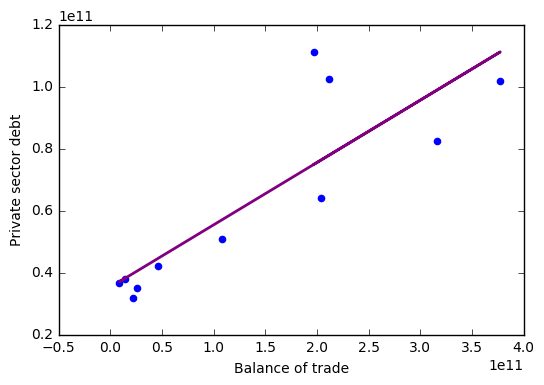

In [36]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

X = bot[:, np.newaxis]
y = psd

fig, ax = plt.subplots()
# Los puntos originales:
ax.scatter(X, y, color='blue')
# El modelo.
clf.fit(X, y)
ax.plot(X, clf.predict(X), color='purple', linewidth=2)
ax.set_xlabel("Balance of trade")
ax.set_ylabel("Private sector debt")